In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from skimage import io, transform
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
samples_df = pd.read_csv('choosen_sample.csv')
samples_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0004060,ISIC_0030825,akiec,histo,40.0,male,face
1,HAM_0006220,ISIC_0024470,akiec,histo,60.0,male,upper extremity
2,HAM_0001576,ISIC_0033705,akiec,histo,60.0,male,face
3,HAM_0001624,ISIC_0032277,akiec,histo,85.0,male,scalp
4,HAM_0005551,ISIC_0029900,akiec,histo,60.0,male,face
...,...,...,...,...,...,...,...
800,HAM_0007097,ISIC_0034214,vasc,histo,60.0,male,trunk
801,HAM_0006406,ISIC_0026336,vasc,consensus,50.0,male,trunk
802,HAM_0005713,ISIC_0030956,vasc,histo,60.0,female,neck
803,HAM_0005011,ISIC_0026393,vasc,consensus,80.0,male,trunk


In [3]:
samples_df.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

In [4]:
samples_df_one_hot = pd.get_dummies(samples_df, columns=['sex', 'localization'], drop_first=True)
samples_df_one_hot

,lesion_id,image_id,dx,dx_type,age,sex_male,sex_unknown,localization_back,localization_chest,localization_ear,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,HAM_0004060,ISIC_0030825,akiec,histo,40.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,HAM_0006220,ISIC_0024470,akiec,histo,60.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,HAM_0001576,ISIC_0033705,akiec,histo,60.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,HAM_0001624,ISIC_0032277,akiec,histo,85.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,HAM_0005551,ISIC_0029900,akiec,histo,60.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,HAM_0007097,ISIC_0034214,vasc,histo,60.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
801,HAM_0006406,ISIC_0026336,vasc,consensus,50.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
802,HAM_0005713,ISIC_0030956,vasc,histo,60.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
803,HAM_0005011,ISIC_0026393,vasc,consensus,80.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
metadata_df = samples_df_one_hot.drop(columns=['lesion_id', 'image_id', 'dx', 'dx_type'])
metadata_df

,age,sex_male,sex_unknown,localization_back,localization_chest,localization_ear,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,40.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,60.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,85.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,60.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
801,50.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
802,60.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
803,80.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
scaler = MinMaxScaler()

metadata_df['age_scaled'] = scaler.fit_transform(metadata_df[['age']])
metadata_df = metadata_df.drop(columns=['age'])
metadata_df

,sex_male,sex_unknown,localization_back,localization_chest,localization_ear,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity,age_scaled
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.470588
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.705882
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.705882
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.000000
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.705882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.705882
801,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.588235
802,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.705882
803,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.941176


In [7]:
y = samples_df_one_hot['dx']
label_map = {label: idx for idx, label in enumerate(y.unique())}
y_int = y.map(label_map)
y_int

0      0
1      0
2      0
3      0
4      0
      ..
800    6
801    6
802    6
803    6
804    6
Name: dx, Length: 805, dtype: int64

In [8]:
samples_df_one_hot

,lesion_id,image_id,dx,dx_type,age,sex_male,sex_unknown,localization_back,localization_chest,localization_ear,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,HAM_0004060,ISIC_0030825,akiec,histo,40.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,HAM_0006220,ISIC_0024470,akiec,histo,60.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,HAM_0001576,ISIC_0033705,akiec,histo,60.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,HAM_0001624,ISIC_0032277,akiec,histo,85.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,HAM_0005551,ISIC_0029900,akiec,histo,60.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,HAM_0007097,ISIC_0034214,vasc,histo,60.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
801,HAM_0006406,ISIC_0026336,vasc,consensus,50.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
802,HAM_0005713,ISIC_0030956,vasc,histo,60.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
803,HAM_0005011,ISIC_0026393,vasc,consensus,80.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [9]:
img_paths = []

for index, row in samples_df_one_hot.iterrows():
    img_paths.append(f'ham_sample/{row["dx"]}/{row["image_id"]}.jpg')
    
img_paths_series = pd.Series(img_paths)
img_paths_series

0      ham_sample/akiec/ISIC_0030825.jpg
1      ham_sample/akiec/ISIC_0024470.jpg
2      ham_sample/akiec/ISIC_0033705.jpg
3      ham_sample/akiec/ISIC_0032277.jpg
4      ham_sample/akiec/ISIC_0029900.jpg
                     ...                
800     ham_sample/vasc/ISIC_0034214.jpg
801     ham_sample/vasc/ISIC_0026336.jpg
802     ham_sample/vasc/ISIC_0030956.jpg
803     ham_sample/vasc/ISIC_0026393.jpg
804     ham_sample/vasc/ISIC_0028146.jpg
Length: 805, dtype: object

In [10]:
desired_height = 150
desired_width = 200

image = io.imread(img_paths_series[0])
resized_image = transform.resize(image, (desired_height, desired_width))

resized_image.shape


(150, 200, 3)

In [11]:
resized_image

array([[[0.69793898, 0.57186489, 0.56480115],
        [0.70244971, 0.56883938, 0.56505357],
        [0.71030441, 0.5820435 , 0.57837808],
        ...,
        [0.55894647, 0.37471101, 0.36622205],
        [0.54532899, 0.36345786, 0.35779989],
        [0.5543048 , 0.37561261, 0.36261695]],

       [[0.69459181, 0.56161526, 0.55412668],
        [0.68564098, 0.53542068, 0.53776679],
        [0.69827682, 0.56341243, 0.56560983],
        ...,
        [0.55038397, 0.36723704, 0.36817876],
        [0.54670515, 0.36290564, 0.36952255],
        [0.55589118, 0.37589396, 0.37478257]],

       [[0.69250852, 0.55625767, 0.55631545],
        [0.68492098, 0.51878507, 0.52836895],
        [0.68732471, 0.53583065, 0.53317718],
        ...,
        [0.55555326, 0.37072691, 0.37183969],
        [0.55890474, 0.38419632, 0.39075516],
        [0.56926007, 0.39962968, 0.40783787]],

       ...,

       [[0.67215417, 0.55317948, 0.56105142],
        [0.67393255, 0.54997811, 0.54324861],
        [0.67048415, 0

In [12]:
def read_img(i):
    image = io.imread(img_paths_series[i])
    resized_image = transform.resize(image, (desired_height, desired_width))
    return resized_image

images = np.array([read_img(i) for i in range(len(img_paths_series))])

images.shape

(805, 150, 200, 3)

In [13]:
class ImageMetadataClassifier:
    def __init__(self, image_shape, num_classes, metadata_input_shape):
        self.image_shape = image_shape
        self.num_classes = num_classes
        self.metadata_input_shape = metadata_input_shape

    def build_cnn(self):
        model = models.Sequential([
            layers.Rescaling(1./255, input_shape=(image_shape)),
            layers.Conv2D(16, 3, padding='valid', activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(32, 3, padding='valid', activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(64, 3, padding='valid', activation='relu'),
            layers.MaxPooling2D(),
            layers.Flatten(),
            layers.Dropout(0.3),
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(64, activation='relu'),        ])
        return model

    def build_dense_network(self):
        model = models.Sequential([
            layers.Input(shape=self.metadata_input_shape),
            layers.Dense(16, activation='relu'),
            layers.Dense(16, activation='relu')
        ])
        return model

    def build_combined_model(self):
        cnn_model = self.build_cnn()
        dense_model = self.build_dense_network()

        combined_input = layers.concatenate([cnn_model.output, dense_model.output])
        combined_output = layers.Dense(64, activation='relu')(combined_input)
        combined_output = layers.Dense(32, activation='relu')(combined_output)
        combined_output = layers.Dense(self.num_classes, activation='softmax')(combined_output)

        combined_model = models.Model(inputs=[cnn_model.input, dense_model.input], outputs=combined_output)
        return combined_model

In [14]:
image_shape = (150, 200, 3)
num_classes = 7
metadata_input_shape = (16,)

classifier = ImageMetadataClassifier(image_shape, num_classes, metadata_input_shape)

combined_model = classifier.build_combined_model()
combined_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 rescaling_input (InputLayer)   [(None, 150, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 200, 3)  0           ['rescaling_input[0][0]']        
                                                                                                  
 conv2d (Conv2D)                (None, 148, 198, 16  448         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

In [15]:
X_images_train, X_images_test, metadata_train, metadata_test, y_train, y_test = train_test_split(
    images, metadata_df, y_int, test_size=0.15, random_state=42
)

In [19]:
lr = 0.0001

combined_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [22]:
epochs = 10

In [20]:
history = combined_model.fit([X_images_train, metadata_train], y_train, epochs=epochs, batch_size=32, validation_split=0.15)

Epoch 1/10
19/19 [==============================] - 1s 45ms/step - loss: nan - accuracy: 0.1274 - val_loss: nan - val_accuracy: 0.1845
Epoch 2/10
19/19 [==============================] - 1s 34ms/step - loss: nan - accuracy: 0.1274 - val_loss: nan - val_accuracy: 0.1845
Epoch 3/10
19/19 [==============================] - 1s 34ms/step - loss: nan - accuracy: 0.1274 - val_loss: nan - val_accuracy: 0.1845
Epoch 4/10
19/19 [==============================] - 1s 35ms/step - loss: nan - accuracy: 0.1274 - val_loss: nan - val_accuracy: 0.1845
Epoch 5/10
19/19 [==============================] - 1s 35ms/step - loss: nan - accuracy: 0.1274 - val_loss: nan - val_accuracy: 0.1845
Epoch 6/10
19/19 [==============================] - 1s 36ms/step - loss: nan - accuracy: 0.1274 - val_loss: nan - val_accuracy: 0.1845
Epoch 7/10
19/19 [==============================] - 1s 35ms/step - loss: nan - accuracy: 0.1274 - val_loss: nan - val_accuracy: 0.1845
Epoch 8/10
19/19 [==============================] - 1s 

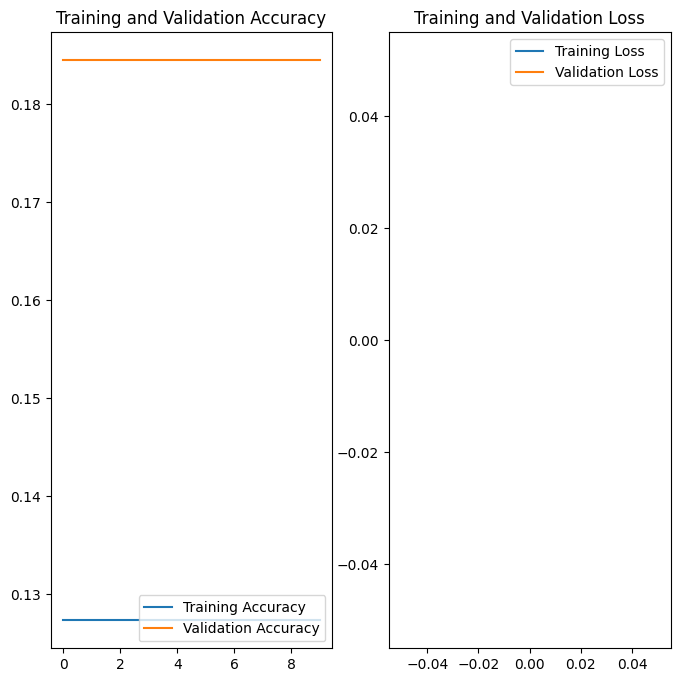

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()